In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
dataframe=pd.read_csv("glass.csv")
dataframe

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [41]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [7]:
print(dataframe.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [8]:
array=dataframe.values
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [9]:

X =array[:,0:-1]
Y =array[:,-1]

In [10]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [11]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
X

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [12]:
pd.DataFrame(Y)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
209,7.0
210,7.0
211,7.0
212,7.0


In [13]:
Y.dtype

dtype('float64')

In [14]:
# Our data is not balanced

In [15]:
# scaling the input features

In [16]:
from sklearn.preprocessing import StandardScaler

## Model Building

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=12)

In [47]:
X.shape,Y.shape

((214, 9), (214,))

In [48]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((171, 9), (43, 9), (171,), (43,))

## Model Testing

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [50]:
# For K=3
knn_classifiers=KNeighborsClassifier(n_neighbors=3)
knn_classifiers.fit(X_train,Y_train)
Y_pred=knn_classifiers.predict(X_test)
print("accuracy_score:", accuracy_score(Y_test,Y_pred))


accuracy_score: 0.7209302325581395


In [51]:
# For K=5
knn_classifiers=KNeighborsClassifier(n_neighbors=5)
knn_classifiers.fit(X_train,Y_train)
Y_pred=knn_classifiers.predict(X_test)
print("accuracy_score:", accuracy_score(Y_test,Y_pred))


accuracy_score: 0.7674418604651163


In [52]:
# For K=7
knn_classifiers=KNeighborsClassifier(n_neighbors=7)
knn_classifiers.fit(X_train,Y_train)
Y_pred=knn_classifiers.predict(X_test)
print("accuracy_score:", accuracy_score(Y_test,Y_pred))


accuracy_score: 0.6744186046511628


In [53]:
# Choosing the best k value.

In [54]:
score=[]
k_range=(i*2+1 for i in range(3,20,2))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train , Y_train, cv=5)
    score.append(scores.mean())
    
score

[0.6144537815126051,
 0.5969747899159664,
 0.6260504201680671,
 0.5500840336134454,
 0.533109243697479,
 0.5332773109243698,
 0.5326050420168068,
 0.5154621848739496,
 0.5502521008403362]

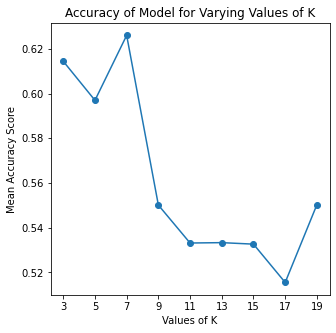

In [55]:
# Plot n values and average accuracy scores
plt.plot(range(3,20,2),score, marker='o')

# Added titles and adjust dimensions
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(range(3,20,2))
plt.rcParams['figure.figsize'] = (5,5) 

plt.show()

In [56]:
score.index(max(score))

2

In [57]:
# best cv score is of knn value 7 i.e 0.6260.

In [58]:
# For K=7
knn_classifiers=KNeighborsClassifier(n_neighbors=7)
knn_classifiers.fit(X_train,Y_train)
Y_pred=knn_classifiers.predict(X_test)
print("accuracy_score:", accuracy_score(Y_test,Y_pred))

accuracy_score: 0.6744186046511628


In [61]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         1.0       0.67      0.83      0.74        12
         2.0       0.79      0.69      0.73        16
         3.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       1.00      0.25      0.40         4
         7.0       0.70      0.88      0.78         8

    accuracy                           0.67        43
   macro avg       0.53      0.44      0.44        43
weighted avg       0.70      0.67      0.66        43

